## Does varying cue-stimulus interval affect the sensory discrimination performance in the antisaccade task?

In [1]:
#| include: false
#| label: load-packages
library(tidyverse)
library(readr)
library(broom)
library(papaja)
library(scales)
library(latex2exp)
library(scales)
library(ggtext)
library(latex2exp)
library(tseries)
library(BayesFactor)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: tinylabels


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: coda

Loading required package: Matrix


Attaching package: ‘Matr

In [2]:
options(repr.plot.width = 8)
options(repr.plot.height = 6)

# Data loading 

In [3]:
#| label: load-data
#| include: false

data.names <-
  list.files('../Data_Full/', full.names = T, pattern = '*.csv$')
data.files <- read_csv(data.names)

Rows: 86598 Columns: 10
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): PART_ID, Trial_type, Stim_letter, Key_pressed, letter_choose
dbl (4): Trial_no, PDI, Rt, Stimulus Time
lgl (1): Corr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
#| include: false
data.aggr <-
  data.files |>
  filter(Trial_type == "experiment", Rt > 0.0) |> # Experiment and no timeout
  select(PART_ID, PDI, Corr) |>
  mutate(t = PDI * 16.6) |>
  group_by(PART_ID, t) |>
  summarise(mean_corr = 100.0 * mean(Corr)) 

`summarise()` has grouped output by 'PART_ID'. You can override using the `.groups` argument.


# Fig 2. Single participant Data

In [5]:
unique(data.aggr$PART_ID)

[1] "001K22"       "002M29"       "10K21"        "11M35"        "12M24"       
  [6] "13K24"        "14K21"        "15M20"        "16K31"        "17K30"       
 [11] "18K27"        "19K22"        "1K22"         "20K22"        "22K21"       
 [16] "23K21"        "24K20"        "25K32"        "26K30"        "27M31"       
 [21] "28K21"        "29K21"        "29K26"        "2M24"         "30M34"       
 [26] "32K40"        "32M45"        "3A-MK2912K28" "3K25"         "4M18"        
 [31] "5M29"         "6K22"         "7K19"         "8K24"         "9K30"        
 [36] "A003K26"      "A004M40"      "A005K22"      "A007K26"      "A008K28"     
 [41] "A009K27"      "A010K18"      "A011M23"      "A012M21"      "A014M36"     
 [46] "A015M23"      "A016K29"      "A017M23"      "A018K23"      "A019M44"     
 [51] "A021K21"      "A021K22"      "A022K25"      "A023K31"      "A025M31"     
 [56] "A026K20"      "A026K23"      "A027M23"      "A028K24"      "A029K23"     
 [61] "A030K20"      "A031K23"      "A032K23"      "A034K24"      "AO033K23"    
 [66] "X001K18"      "X002K21"      "X005K23"      "X006K21"      "X008K22"     
 [71] "X009K19"      "X010K22"      "X011K27"      "X012K19"      "X013K23"     
 [76] "X014K22"      "X015M27"      "X017M20"      "X021K20"      "X022K19"     
 [81] "X025M20"      "X026-02K18"   "X027K24"      "X028K20"      "X029M21"     
 [86] "X030K22"      "X031K20"      "X032K19"      "X033K19"      "X034K26"     
 [91] "X035K20"      "X036M47"      "X037K35"      "X038M50"      "X039M35"     
 [96] "X040K32"      "X041M18"      "X042K25"      "X043K27"      "X044K33"     
[101] "X045K19"      "X047M59"

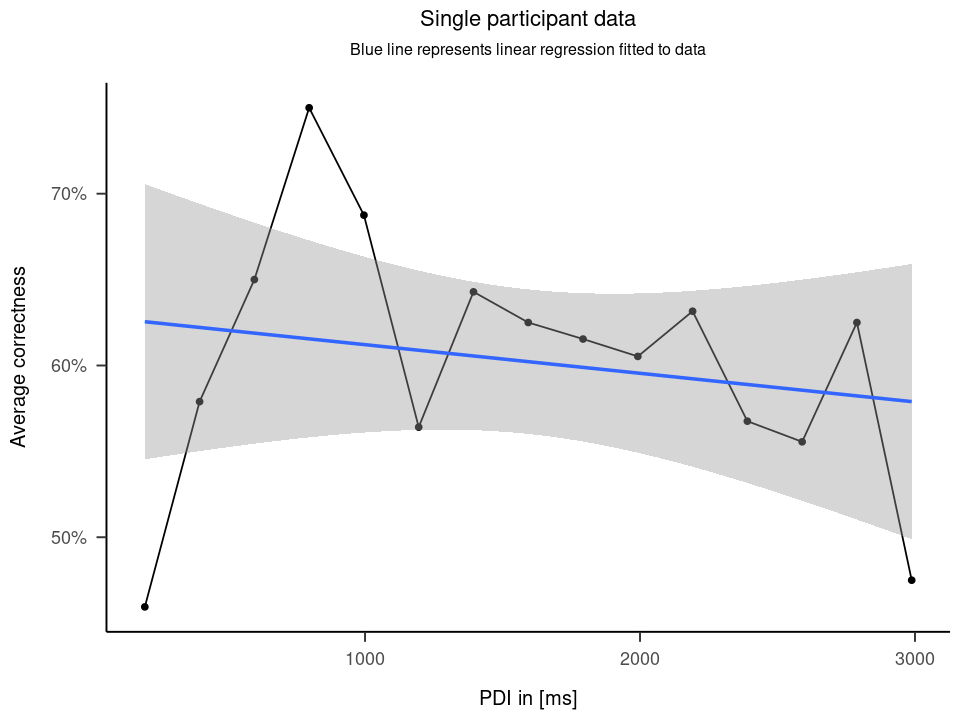

In [6]:
#| echo: false
data.aggr |> 
  filter(PART_ID == "A014M36") |>
  ggplot(mapping = aes(x=t, y=mean_corr/100.0)) +
  geom_point() +
  geom_line() + 
  geom_smooth(method='lm', formula = y ~ x) +
  theme_apa() +
  ggtitle("Single participant data", 
          subtitle = "Blue line represents linear regression fitted to data") + 
  scale_y_continuous(labels = scales::percent) +
  labs(x = "PDI in [ms]", y = "Average correctness")

# Fig 3. Beta coeff distribution

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


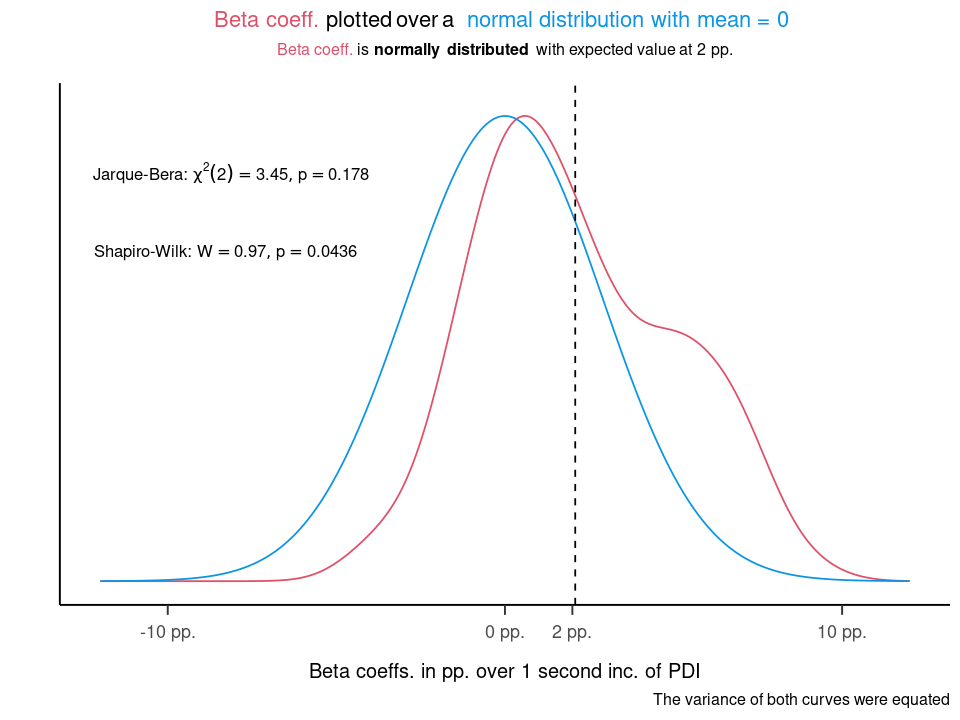

In [7]:
beta_coeffs <- data.aggr |>
  do(model = lm(mean_corr ~ t, data = .)) |>
  mutate(beta  = model$coefficients[[2]])


# Performing Shapiro-Wilk test
shapiro_test <- shapiro.test(beta_coeffs$beta)

# Performing Jarque-Bera test
jarque_bera_test <- jarque.bera.test(beta_coeffs$beta)

# Creating LaTeX strings for the test results
shapiro_latex <-
  TeX(paste(
    "Shapiro-Wilk: $W = ",
    round(shapiro_test$statistic, 2),
    ", p = ",
    signif(shapiro_test$p.value, digits = 3),
    "$"
  ), output = "character")



jarque_bera_latex <-
  TeX(
    paste(
      "Jarque-Bera: $\\chi^2(",
      jarque_bera_test$parameter,
      ") = ",
      round(jarque_bera_test$statistic, 2),
      ", p = ",
      signif(jarque_bera_test$p.value, digits = 3),
      "$"
    )
  )



ggplot() +
  geom_density(data = beta_coeffs, aes(x = beta), color = "#DF5069") +
  stat_function(
    fun = dnorm,
    n = 1000,
    args = list(mean = 0, sd = sd(beta_coeffs$beta)),
    color = "#0D94E5"
  ) +
  theme_apa() +
  labs(
    title = "<span style='color:#DF5069;'>Beta coeff.</span> plotted over a
          <span style='color:#0D94E5;'> normal distribution with mean = 0 </span>",
    subtitle = "<span style='color:#DF5069;'>Beta coeff.</span>
       is **normally distributed** with expected value at 2 pp.",
    x = "Beta coeffs. in pp. over 1 second inc. of PDI",
    y = "",
    caption = "The variance of both curves were equated"
  ) +
  theme(
    plot.title = element_markdown(lineheight = 1.1),
    plot.subtitle = element_markdown(lineheight = 1.1),
    legend.position = "none"
  ) +
  geom_vline(xintercept = mean(beta_coeffs$beta),
             linetype = "dashed") +
  scale_x_continuous(
    labels = percent_format(scale = 1000, suffix = " pp."),
    breaks = c(-.01, 0, .002, .01),
    limits = c(-.012, .012)
  ) +
  ylim(c(0, 140)) +
  annotate(
    "text",
    x = -0.0036,
    y = 100,
    label = shapiro_latex,
    parse = TRUE,
    hjust = 1.1,
    vjust = 1.1,
    size = 3.5
  ) +
  annotate(
    "text",
    x = -0.0032,
    y = 130,
    label = jarque_bera_latex,
    parse = TRUE,
    hjust = 1.1,
    vjust = 2,
    size = 3.5
  ) +
  theme(axis.text.y = element_blank(),  #remove y axis labels
        axis.ticks.y = element_blank())  #remove y axis ticks)

# Fig 4. Possible incremental dynamics

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


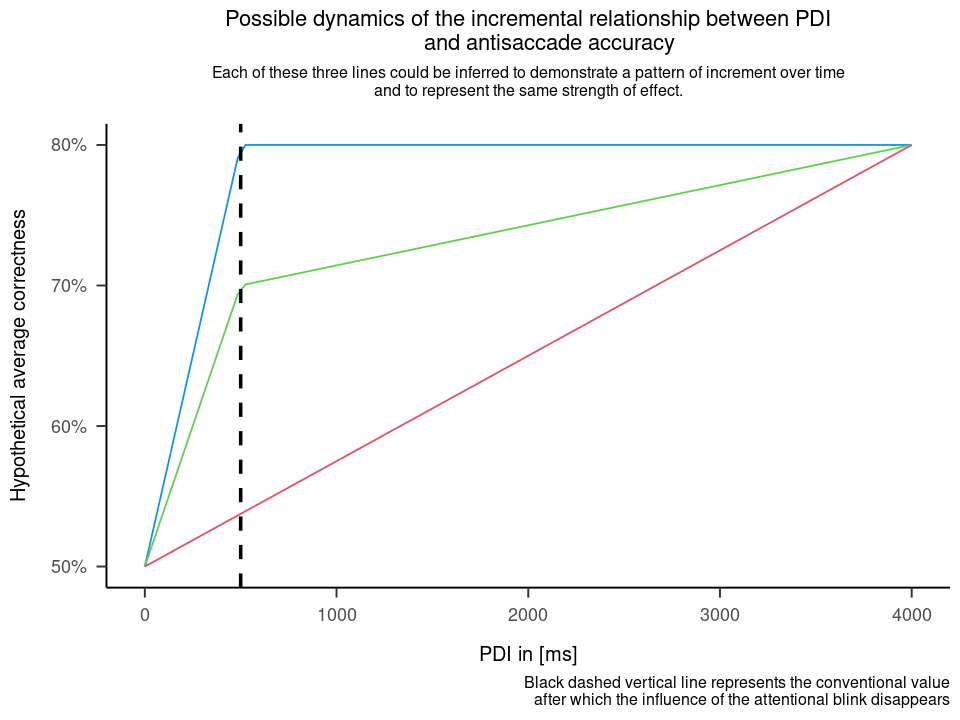

In [9]:
# Create a mock data frame with similar trends to the ones in the image
pdi <- seq(0, 4000, length.out = 100)
accuracy_blue <- ifelse(pdi <= 500, .50 + pdi * (.30/500), .80)
accuracy_green <- ifelse(pdi <= 500, .50 + pdi * (.20/500), .70 + (.10/3500) * (pdi - 500))
accuracy_red <- .50 + pdi * (.30/4000)

data <- data.frame(
  PDI = pdi,
  BlueLine = accuracy_blue,
  GreenLine = accuracy_green,
  RedLine = accuracy_red
)

# Create the plot
ggplot(data) +
  geom_line(aes(x = PDI, y = BlueLine), color = "#0D94E5") +
  geom_line(aes(x = PDI, y = GreenLine), color = "#5ECF4B") +
  geom_line(aes(x = PDI, y = RedLine), color = "#DF5069") +
  labs(
    title = "Possible dynamics of the incremental relationship between PDI
       and antisaccade accuracy",
    subtitle = "Each of these three lines could be inferred to demonstrate a pattern of increment over time\nand to represent the same strength of effect.",
    caption =  "Black dashed vertical line represents the conventional value
    after which the influence of the attentional blink disappears",
    x = "PDI in [ms]",
    y = "Hypothetical average correctness"
  ) +
  geom_vline(xintercept = 500,
             linetype = "dashed",
             color = "black",
             size = 1) +
  theme_apa() +
  scale_y_continuous(labels = scales::percent) +
  theme(
    plot.title = element_text(hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5)
  )

# Fig 5. Beta for two ranges of PDI values

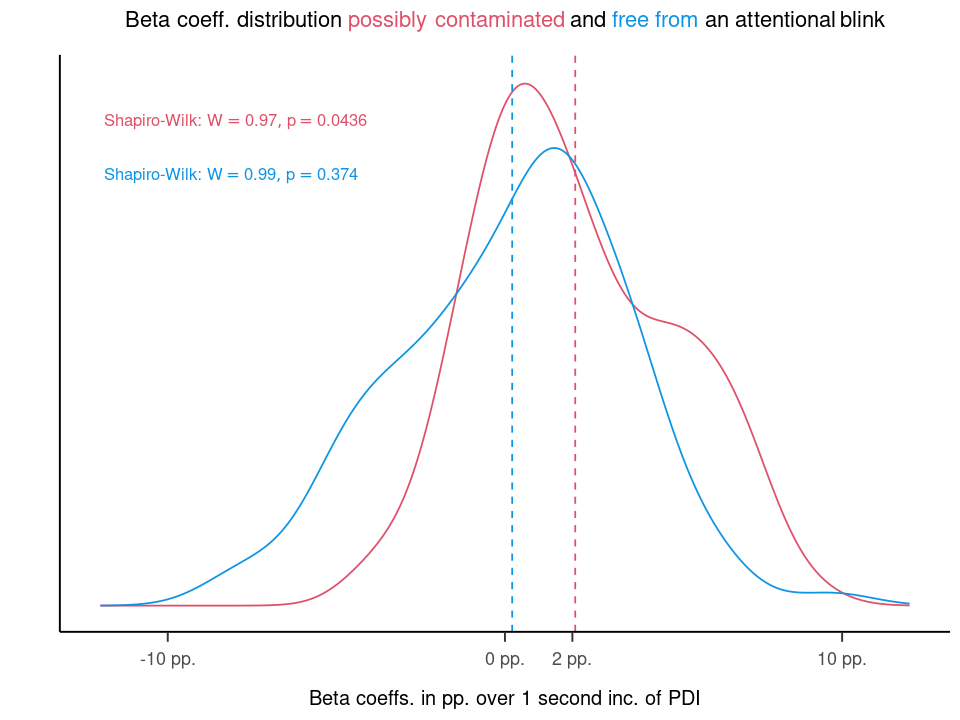

In [83]:
beta_coeffs_full <- data.aggr |>
  do(model = lm(mean_corr ~ t, data = .)) |>
  mutate(beta  = model$coefficients[[2]])

beta_coeffs_no_blink <- data.aggr |>
  filter(t > 800) |>
  do(model = lm(mean_corr ~ t, data = .)) |>
  mutate(beta  = model$coefficients[[2]])

# Performing Shapiro-Wilk test
shapiro_test_full <- shapiro.test(beta_coeffs$beta)
shapiro_test_no_blink <- shapiro.test(beta_coeffs_no_blink$beta)
t_test <-
  t.test(beta_coeffs$beta * 10, beta_coeffs_no_blink$beta * 10)


# Creating LaTeX strings for the test results
shapiro_full_latex <-
  TeX(paste(
    "Shapiro-Wilk: $W = ",
    round(shapiro_test_full$statistic, 2),
    ", p = ",
    signif(shapiro_test_full$p.value, digits = 3),
    "$"
  ), output = "character")


shapiro_no_blink_latex <-
  TeX(paste(
    "Shapiro-Wilk: $W = ",
    round(shapiro_test_no_blink$statistic, 2),
    ", p = ",
    signif(shapiro_test_no_blink$p.value, digits = 3),
    "$"
  ), output = "character")




ggplot() +
  geom_density(data = beta_coeffs_full, aes(x = beta), color = "#DF5069") +
  geom_density(data = beta_coeffs_no_blink, aes(x = beta), color = "#0D94E5") +
  theme_apa() +
  labs(
    title = "Beta coeff. distribution
    <span style='color:#DF5069;'>possibly contaminated</span>
    and
    <span style='color:#0D94E5;'>free from</span>
    an attentional blink",
    x = "Beta coeffs. in pp. over 1 second inc. of PDI",
    y = ""
  ) +
  theme(
    plot.title = element_markdown(lineheight = 1.1),
    plot.subtitle = element_markdown(lineheight = 1.1),
    legend.position = "none"
  ) +
  geom_vline(
    xintercept = mean(beta_coeffs_full$beta),
    linetype = "dashed",
    color = "#DF5069"
  ) +
  geom_vline(
    xintercept = mean(beta_coeffs_no_blink$beta),
    linetype = "dashed",
    color = "#0D94E5"
  ) +
  scale_x_continuous(
    labels = percent_format(scale = 1000, suffix = " pp."),
    breaks = c(-.01, 0, .002, .01),
    limits = c(-.012, .012)
  ) +
  ylim(c(0, 138)) +
  annotate(
    "text",
    x = -0.0033,
    y = 130,
    label = shapiro_full_latex,
    parse = TRUE,
    hjust = 1.1,
    vjust = 1.1,
    size = 3.5,
    color = "#DF5069"
  ) +
  annotate(
    "text",
    x = -0.0036,
    y = 120,
    label = shapiro_no_blink_latex,
    parse = TRUE,
    hjust = 1.1,
    vjust = 2,
    size = 3.5,
    color = "#0D94E5"
  ) +
  theme(axis.text.y = element_blank(),  #remove y axis labels
        axis.ticks.y = element_blank())  #remove y axis ticks)

In [84]:
apa_print(shapiro_test_full)$full

[1] "$W = 0.97$, $p = .044$"

In [85]:
t.test(beta_coeffs_no_blink$beta, mu = 0)


	One Sample t-test

data:  beta_coeffs_no_blink$beta
t = 0.64679, df = 101, p-value = 0.5192
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0004435984  0.0008728126
sample estimates:
   mean of x 
0.0002146071 


In [86]:
# bf_result <- ttestBF(x = beta_coeffs_no_blink$beta, nullInterval = c(-0.00001, 0.00001))
bf_result <- ttestBF(x = beta_coeffs_no_blink$beta, mu=0)
# Print the results
print(bf_result)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.134368 ±0.12%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS

